# 予測結果

In [17]:
import pandas as pd
from pathlib import Path

from geopy.geocoders import Nominatim
import numpy as np
from fasttext import load_model
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


from tqdm import tqdm
tqdm.pandas()

In [2]:
DATA_DIR = Path("/home/knikaido/work/atma10/data/")

In [3]:
train = pd.read_csv(DATA_DIR / 'train.csv')
test = pd.read_csv(DATA_DIR / 'test.csv')
whole_df = pd.concat([train, test]).reset_index(drop=True)

In [5]:
oof = pd.read_csv('./09/oof09.csv')
oof

,0
0,98.687946
1,2.795384
2,0.897081
3,105.865394
4,23.326529
...,...
12021,0.812486
12022,0.080060
12023,4.532468
12024,5.625686


In [6]:
train['oof'] = oof

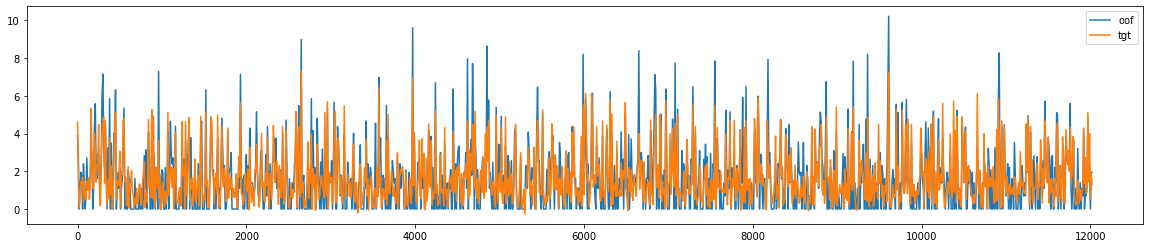

In [26]:
plt.figure(figsize=(20, 4))
plt.plot(np.log1p(train['likes'][::10]), label='oof')
plt.plot(np.log1p(train['oof'][::10]), label='tgt')
plt.legend()

In [20]:
def calc_loss(y_true, y_pred):
    return  np.sqrt(mean_squared_error(y_true, y_pred))

In [25]:
calc_loss(np.log1p(train['oof']), np.log1p(train['likes']))

1.0354060686262923